In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mticker
import geopandas
import seaborn as sns
import numpy as np

In [358]:
plt.rcParams['figure.figsize'] = [50, 25]
plt.rcParams.update({'font.size': 30})

# Convert Coordinates

In [137]:
df = pd.read_csv('data/gwr_cleaned_large.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

coord_x    coord_y        city canton    year          street_name  \
0  2739876.8  1251991.9  St. Gallen     SG  1918.0  Schoretshuebstrasse   
1  2739876.8  1251991.9  St. Gallen     SG  1918.0  Schoretshuebstrasse   
2  2739891.3  1251986.3  St. Gallen     SG  1918.0  Schoretshuebstrasse   
3  2739891.3  1251986.3  St. Gallen     SG  1918.0  Schoretshuebstrasse   
4  2739893.8  1251957.3  St. Gallen     SG  1969.0  Schoretshuebstrasse   

  street_number  multiple_floors  num_rooms   area  kitchen  status  floor  
0            31              1.0        5.0  150.0      1.0    3004      1  
1            31              1.0        3.0   90.0      1.0    3004      2  
2            33              1.0        5.0  180.0      1.0    3004      1  
3            33              1.0        3.0   94.0      1.0    3004      2  
4            35              1.0        6.0  140.0      1.0    3004      1

In [138]:
def convert_to_wgs84(e, n):
    x = (n - 1200000) / 1000000
    y = (e - 2600000) / 1000000
    _lambda = 2.6779094 + \
        (4.728982 * y) + \
        (0.791484 * y * x) + \
        (0.1306 * y * x**2) - \
        (0.0436 * y**3)
    _phi = 16.9023892 + \
        (3.238272 * x) - \
        (0.270978 * y**2) - \
        (0.002528 * x**2) - \
        (0.0447 * y**2 * x) - \
        (0.0140 * x ** 3)
    lon = _lambda * 100 / 36
    lat = _phi * 100 / 36
    
    return (lon, lat)


In [140]:
df['longitude'], df['latitude'] = convert_to_wgs84(df['coord_x'], df['coord_y'])
df.to_csv('data/gwr_cleaned_large_wgs84.csv', index=False)

# Get Bounds of St. Gallen

In [149]:
gpd = geopandas.read_file('data/geodaten_schweiz_gemeinden.json')
gpd = gpd[gpd['NAME_3'] == 'St.Gallen']

In [306]:
gpd = geopandas.read_file('data/wohnviertel.geojson')

# Plot

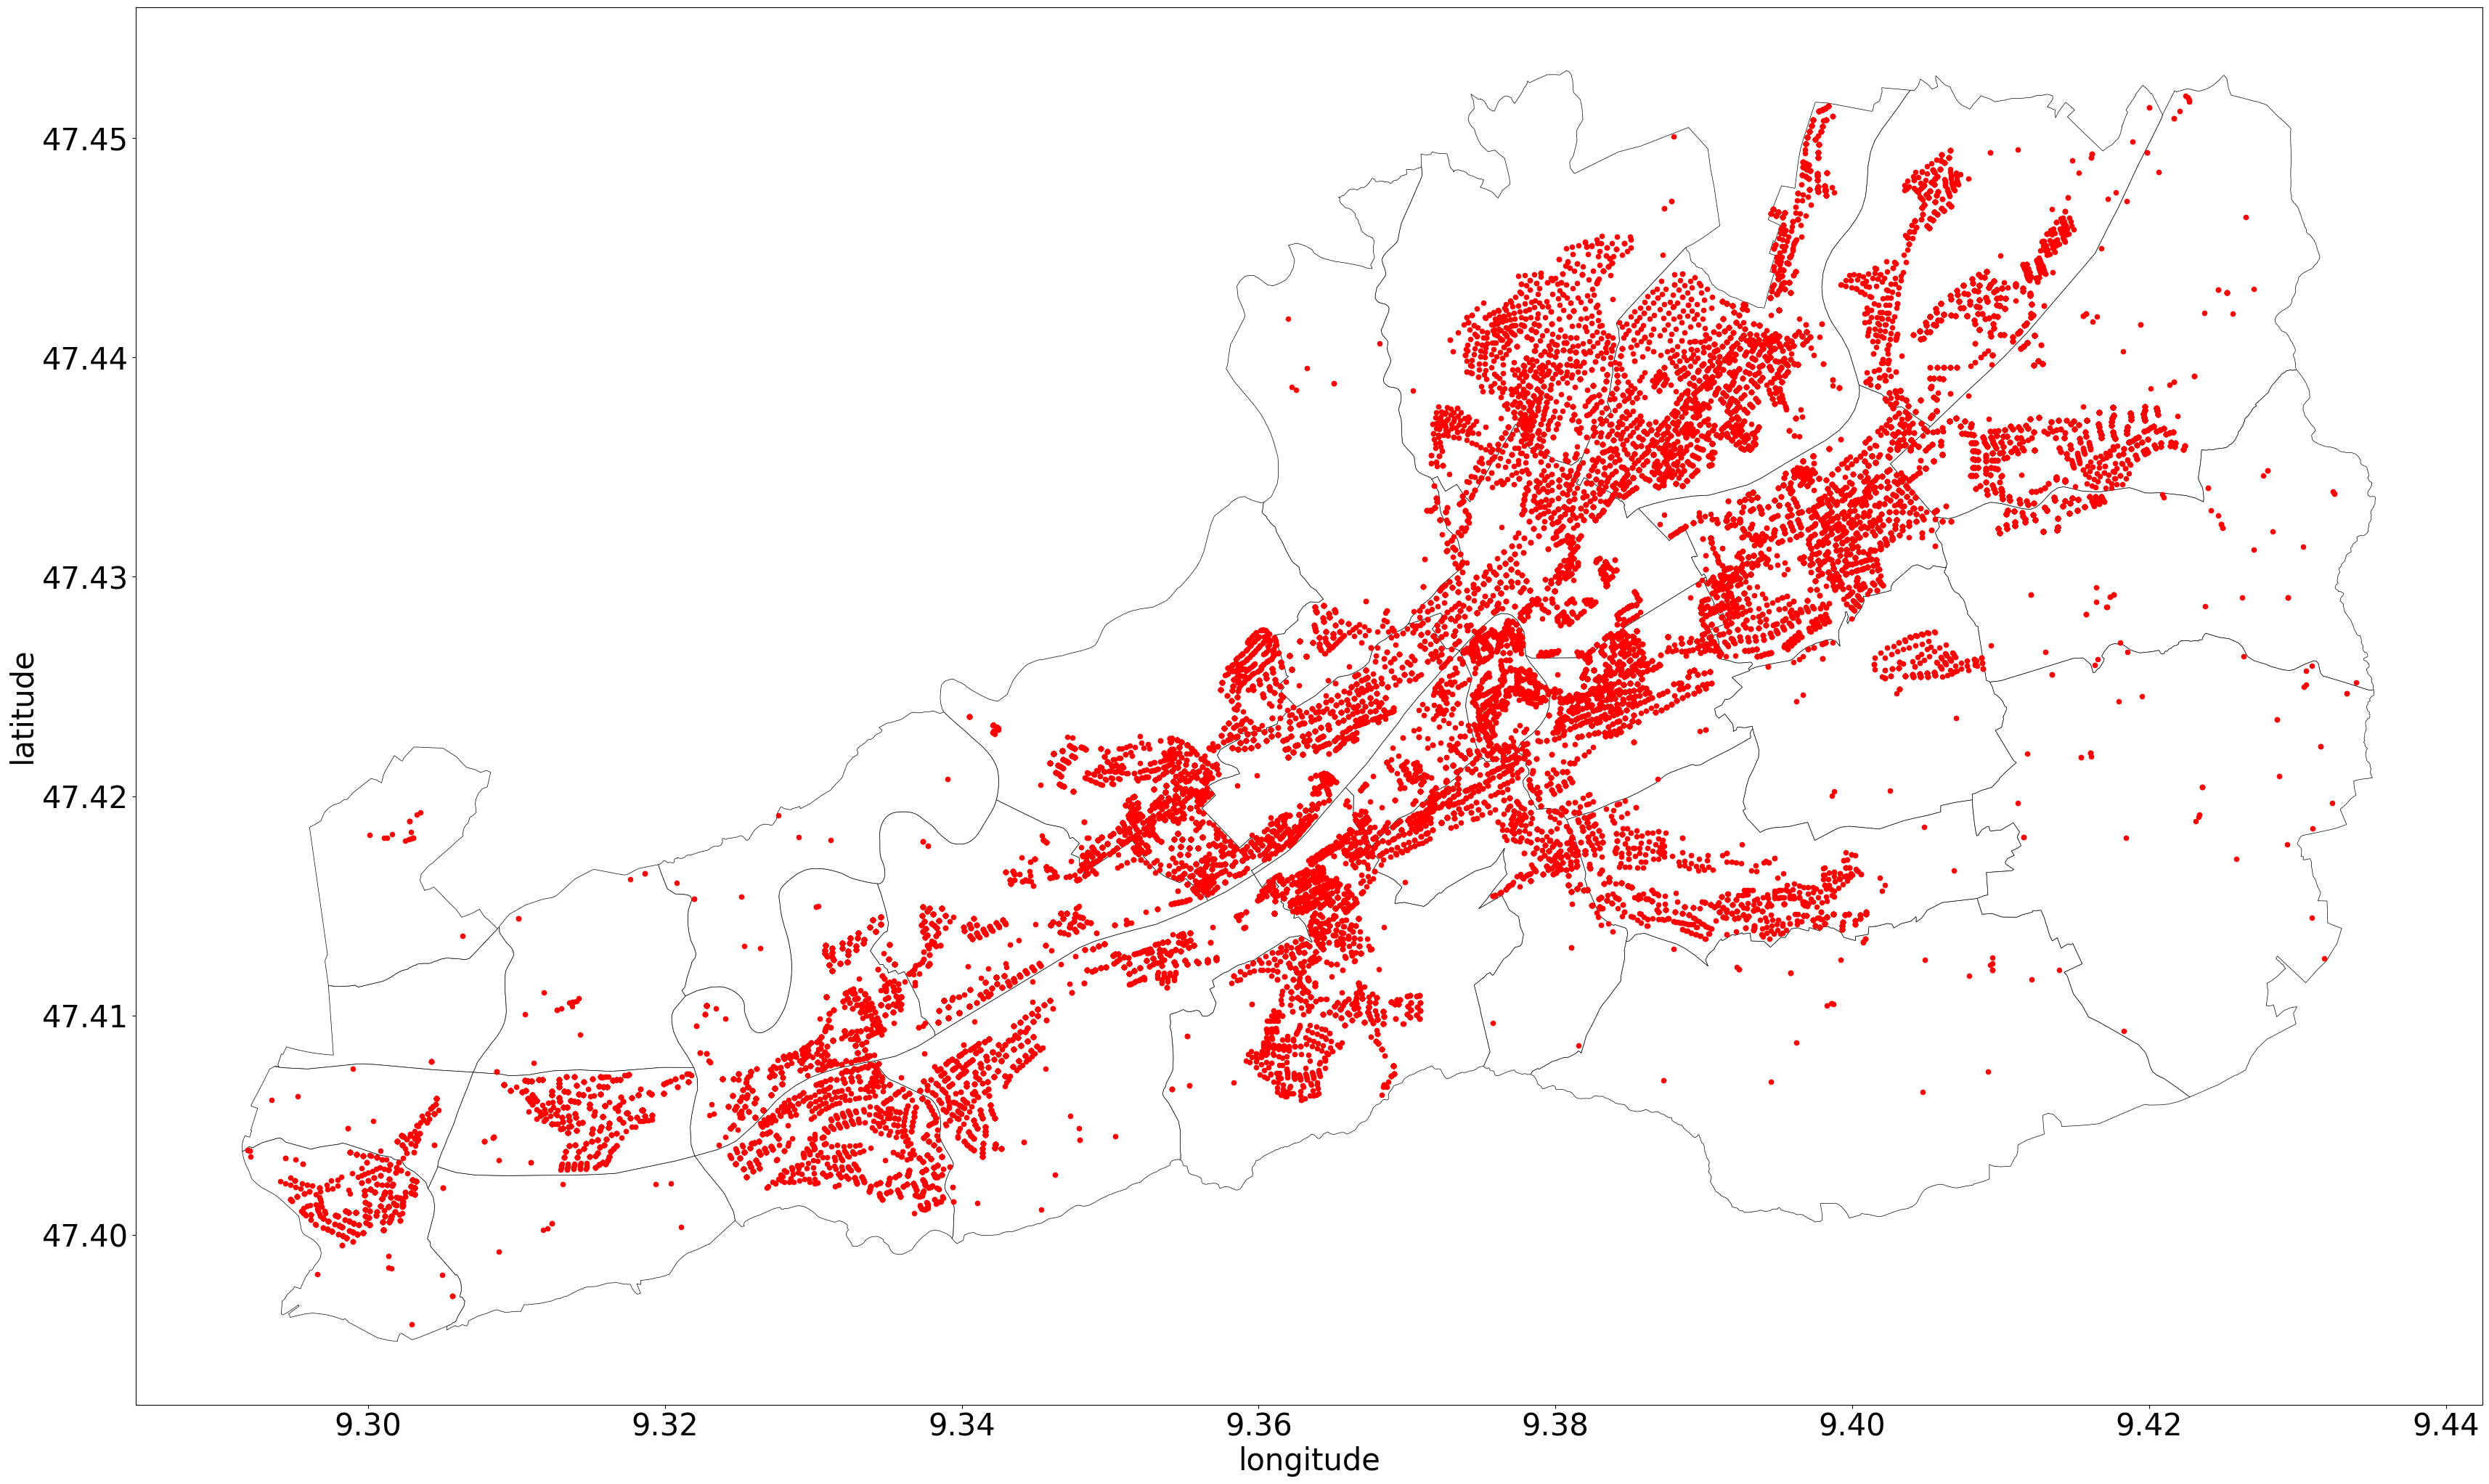

In [308]:
fig, ax = plt.subplots(1)
gpd.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.5)
df.plot(ax=ax, x='longitude', y='latitude', kind='scatter', color='red')
plt.show()

# Empty Apartments

In [152]:
df_empty = pd.read_csv('data/newhome_scrape.csv')
df_empty = df_empty[df_empty['latitude'] < 47.6]

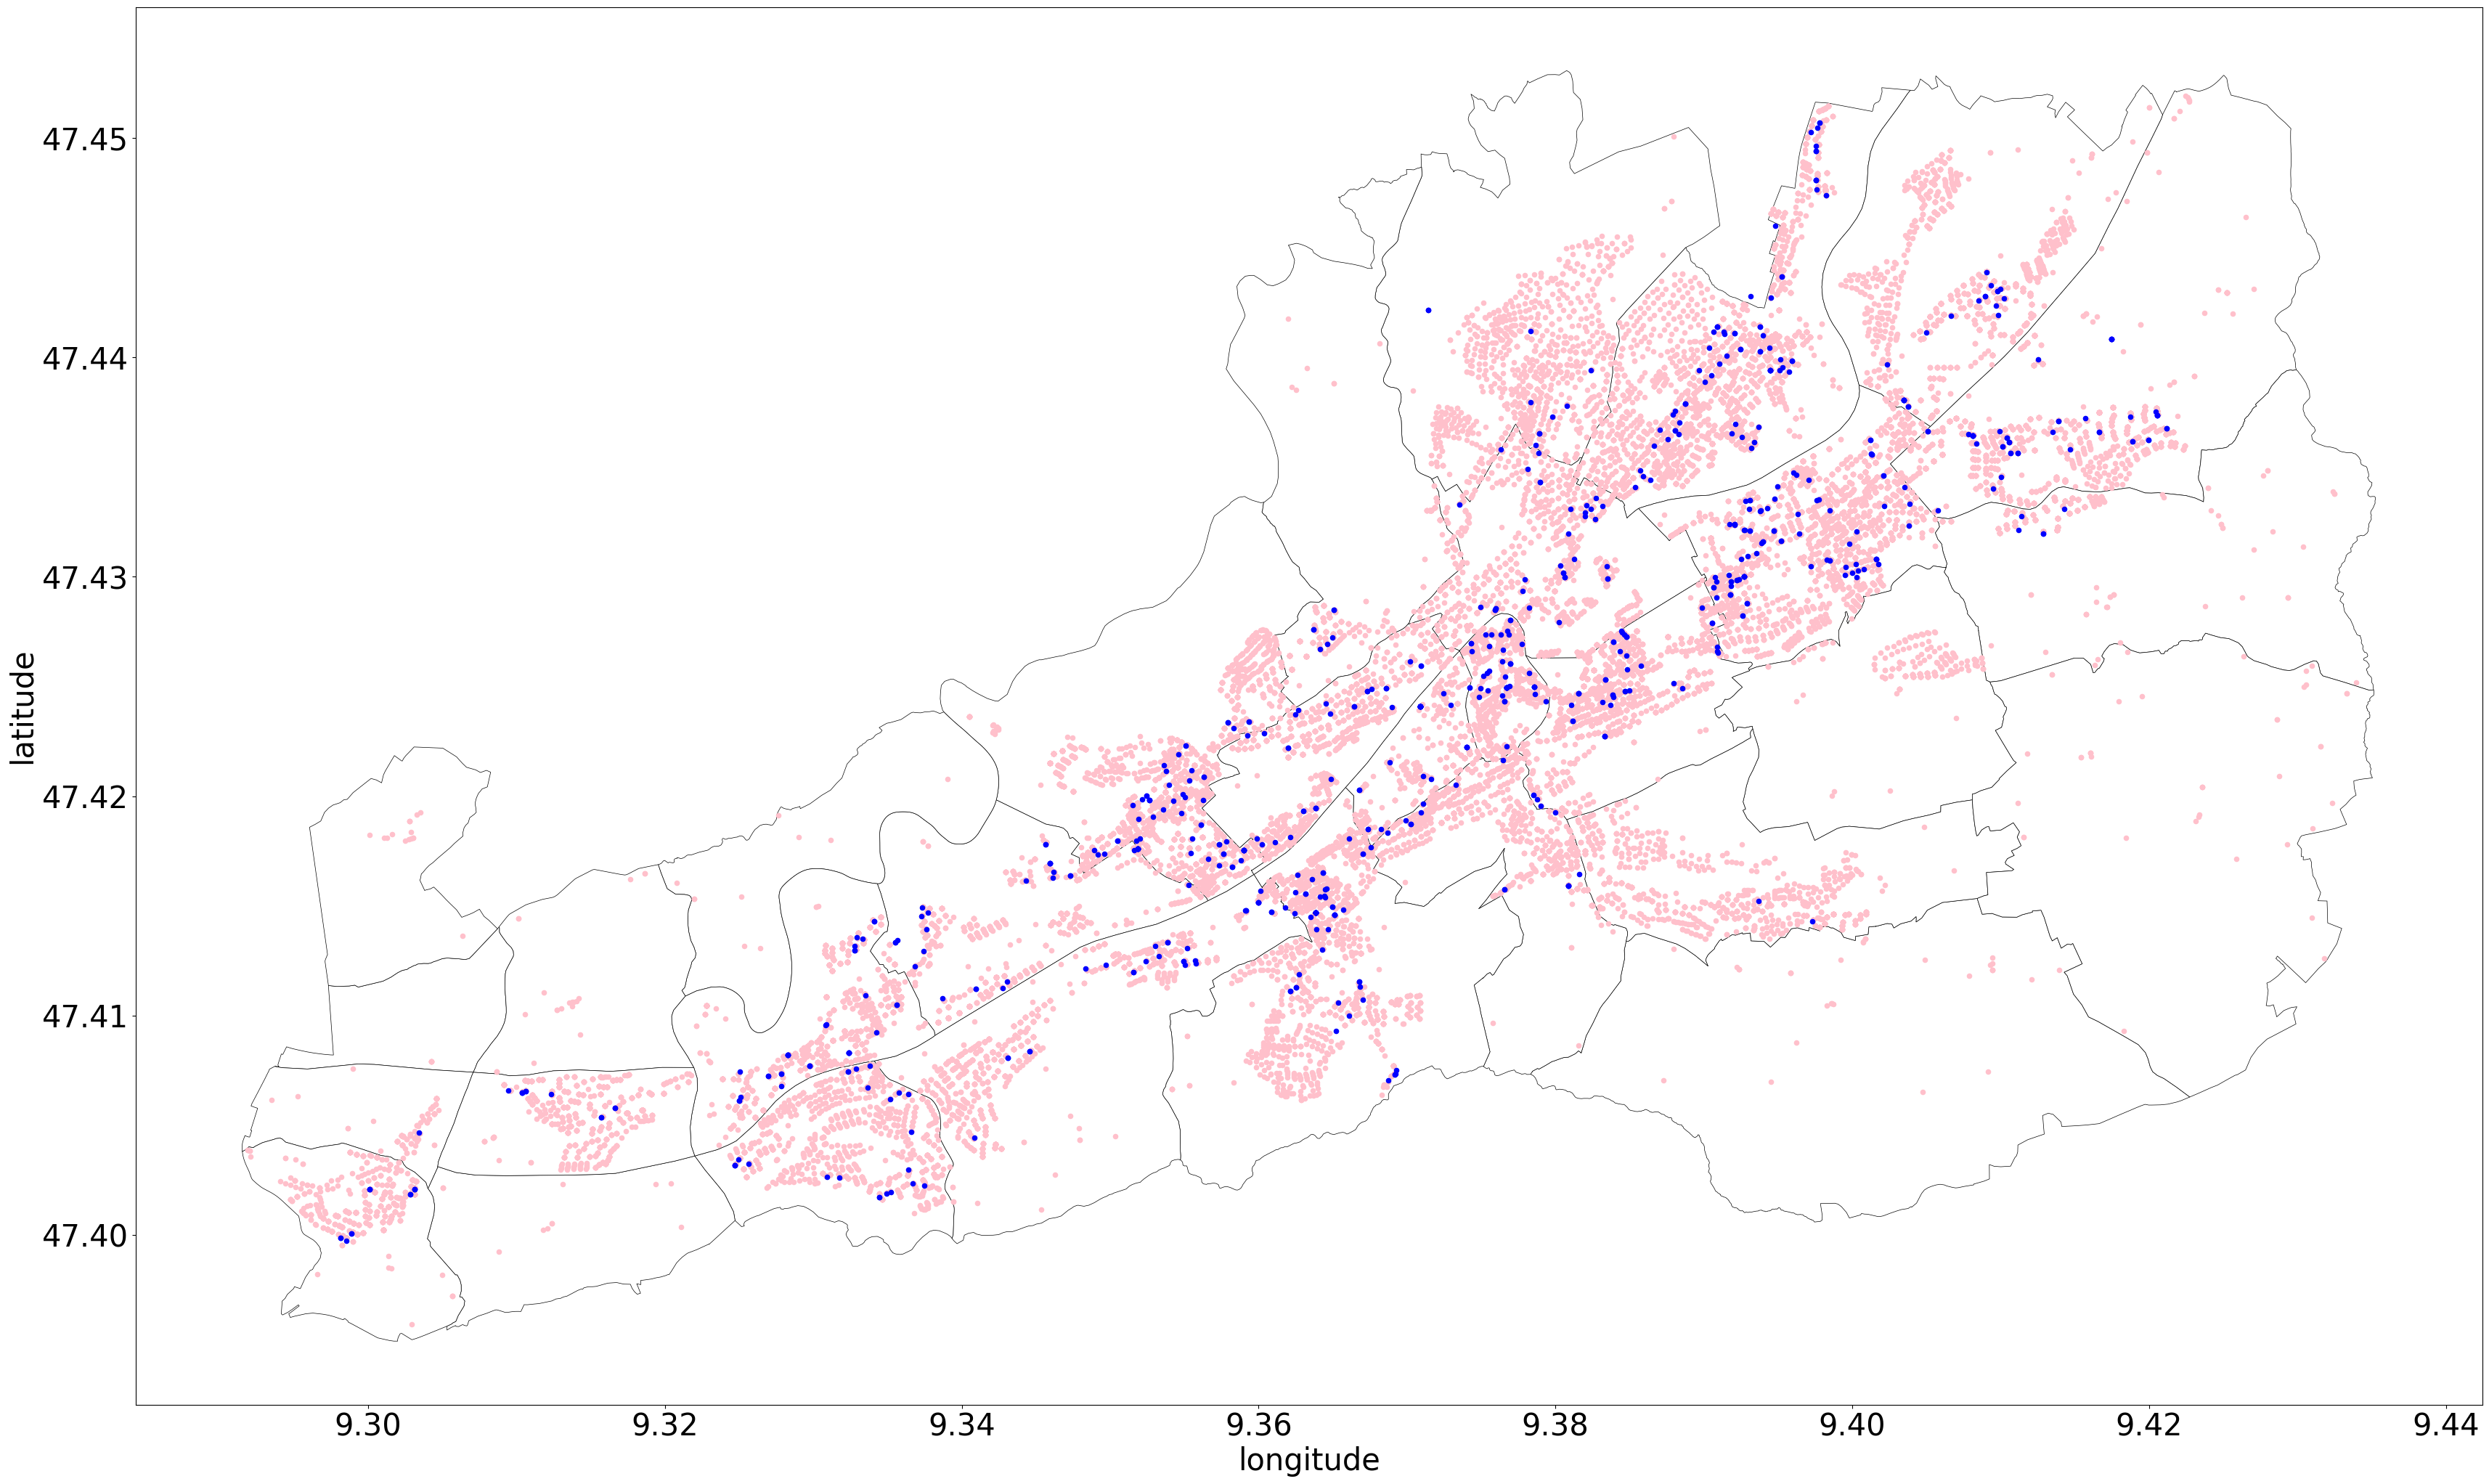

In [309]:
fig, ax = plt.subplots(1)
gpd.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.5)
df.plot(ax=ax, x='longitude', y='latitude', kind='scatter', color='pink')
df_empty.plot(ax=ax, x='longitude', y='latitude', kind='scatter', color='blue')
plt.show()

# Plot Predictions

In [276]:
df_preds = pd.read_csv('data/final_data_v2.csv')
df_preds['longitude'], df_preds['latitude'] = convert_to_wgs84(df_preds['coord_x'], df_preds['coord_y'])

In [351]:
ticks = [i for i in range(1000, 4000, 500)]
tick_text = [str(t) for t in ticks]
tick_val  = [np.log(t) for t in ticks]

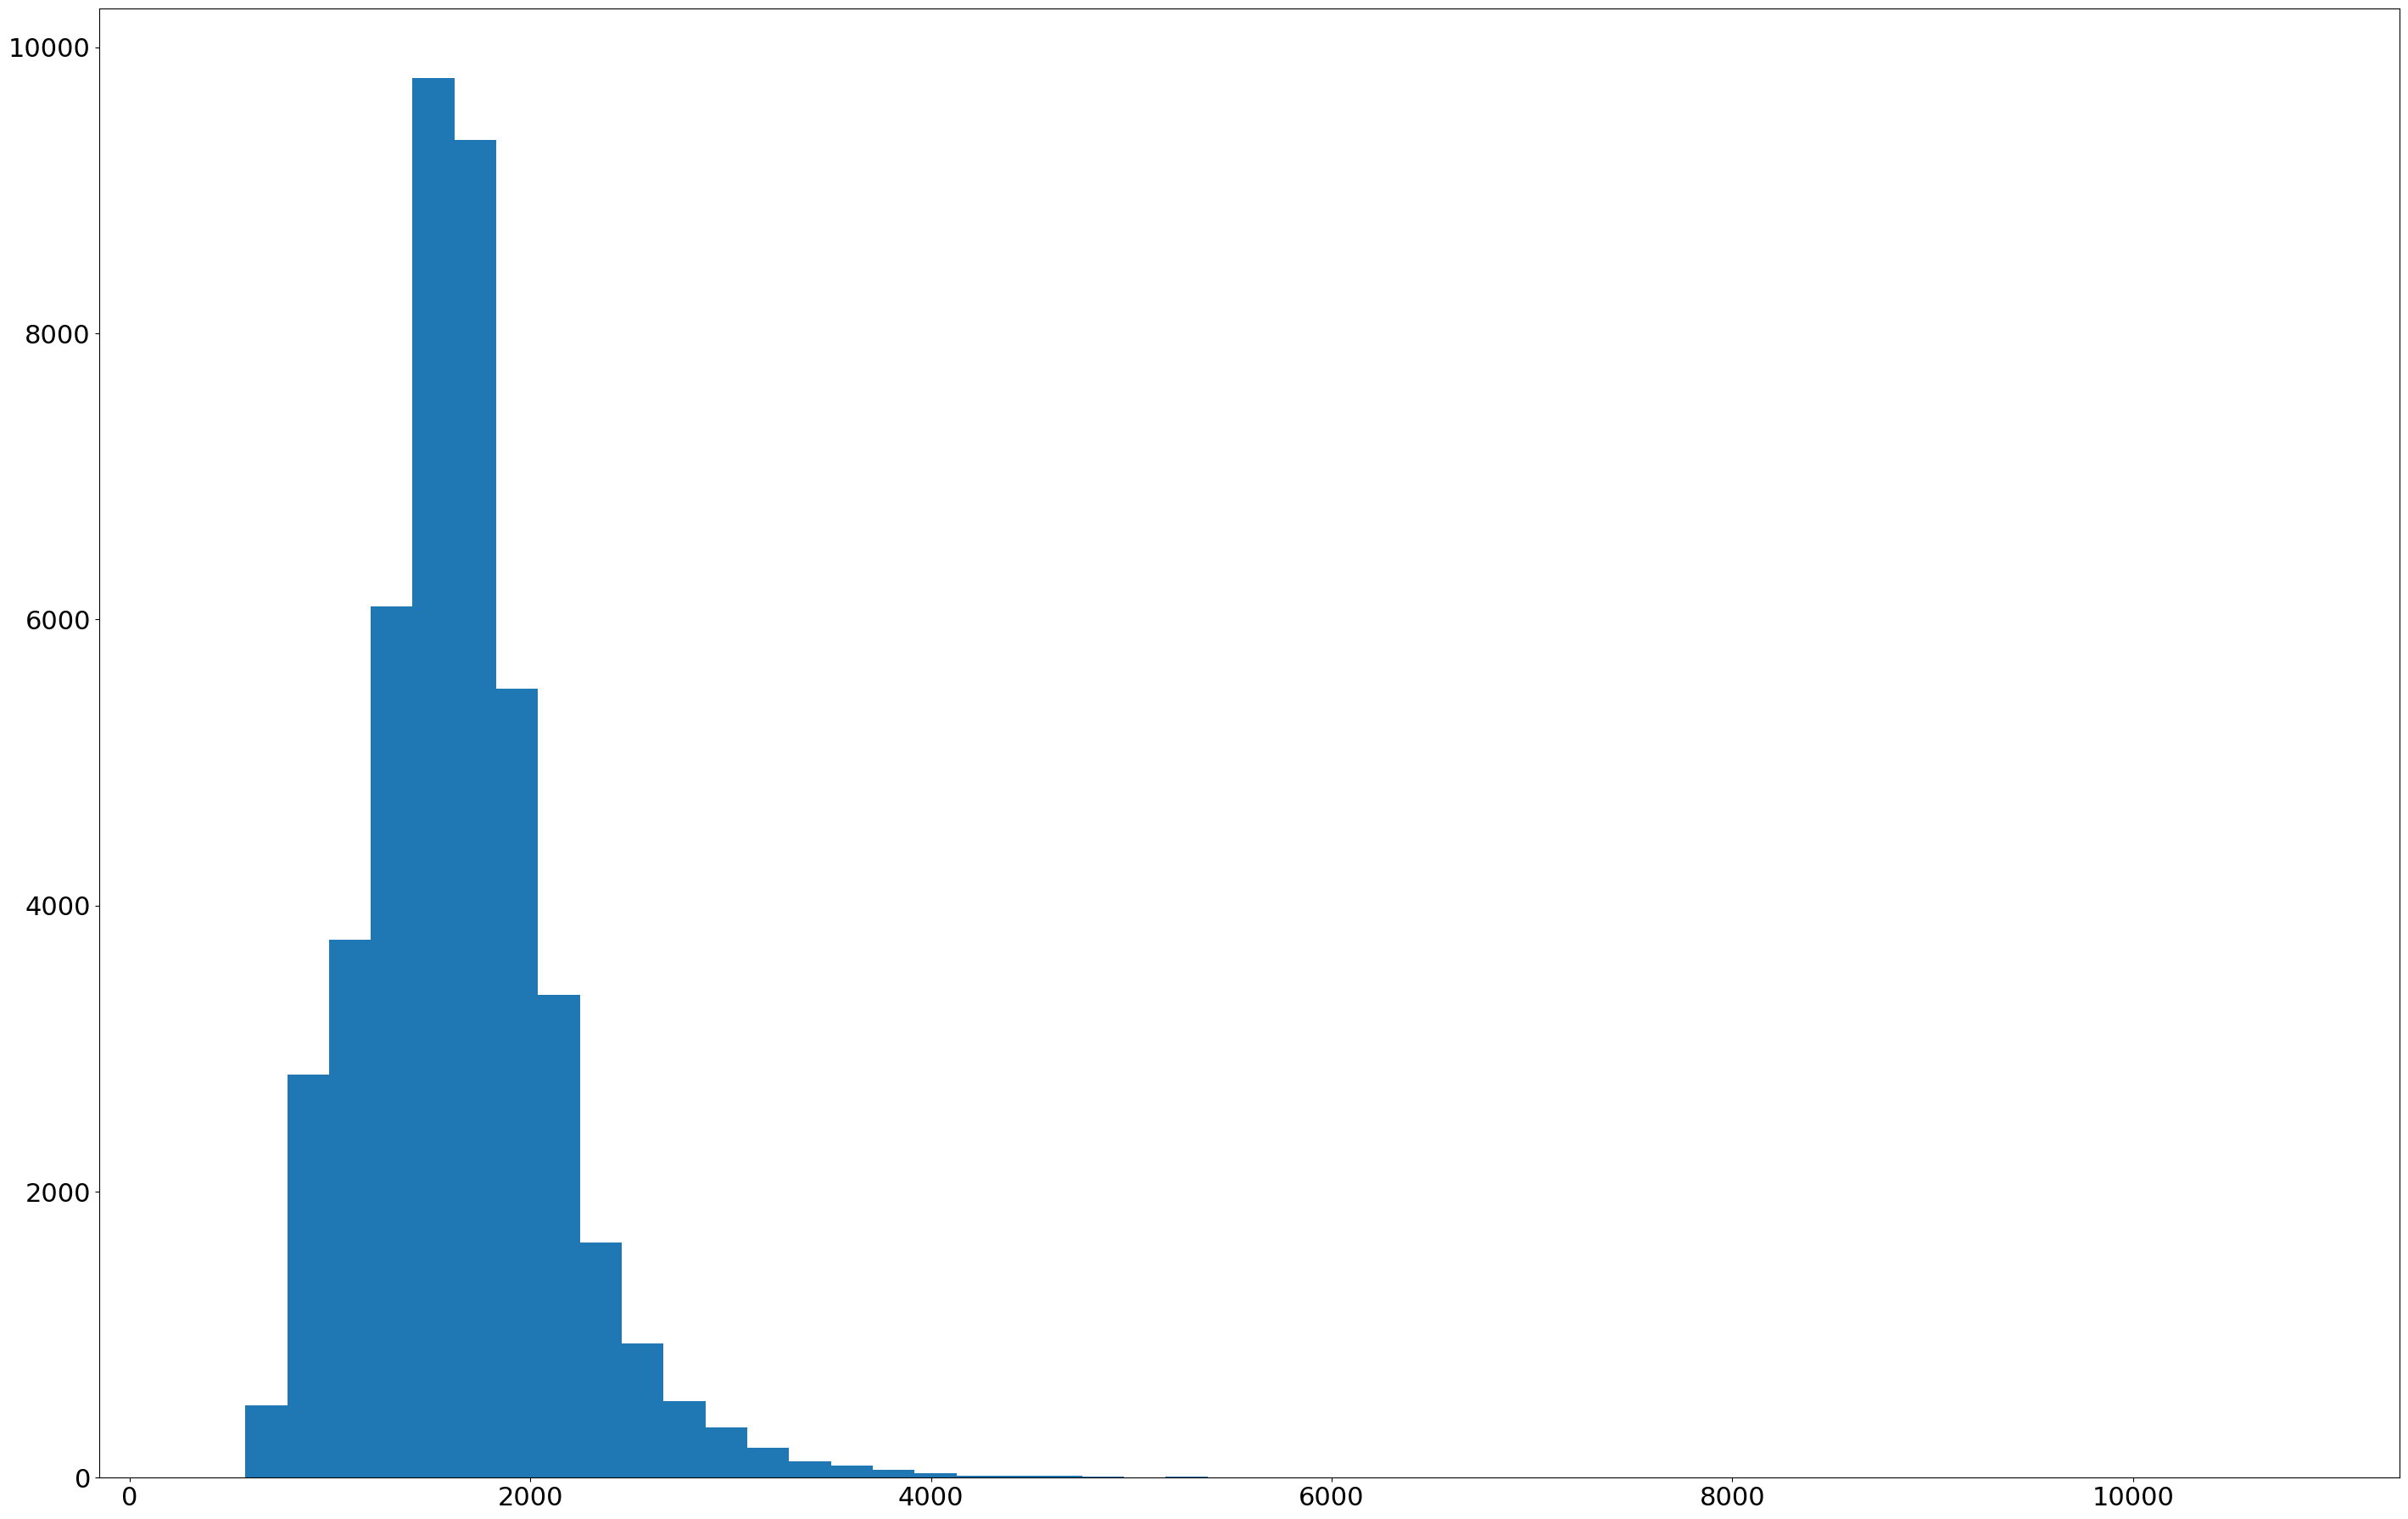

In [352]:
_ = plt.hist(df_preds['prediction'].to_numpy(), bins=50)

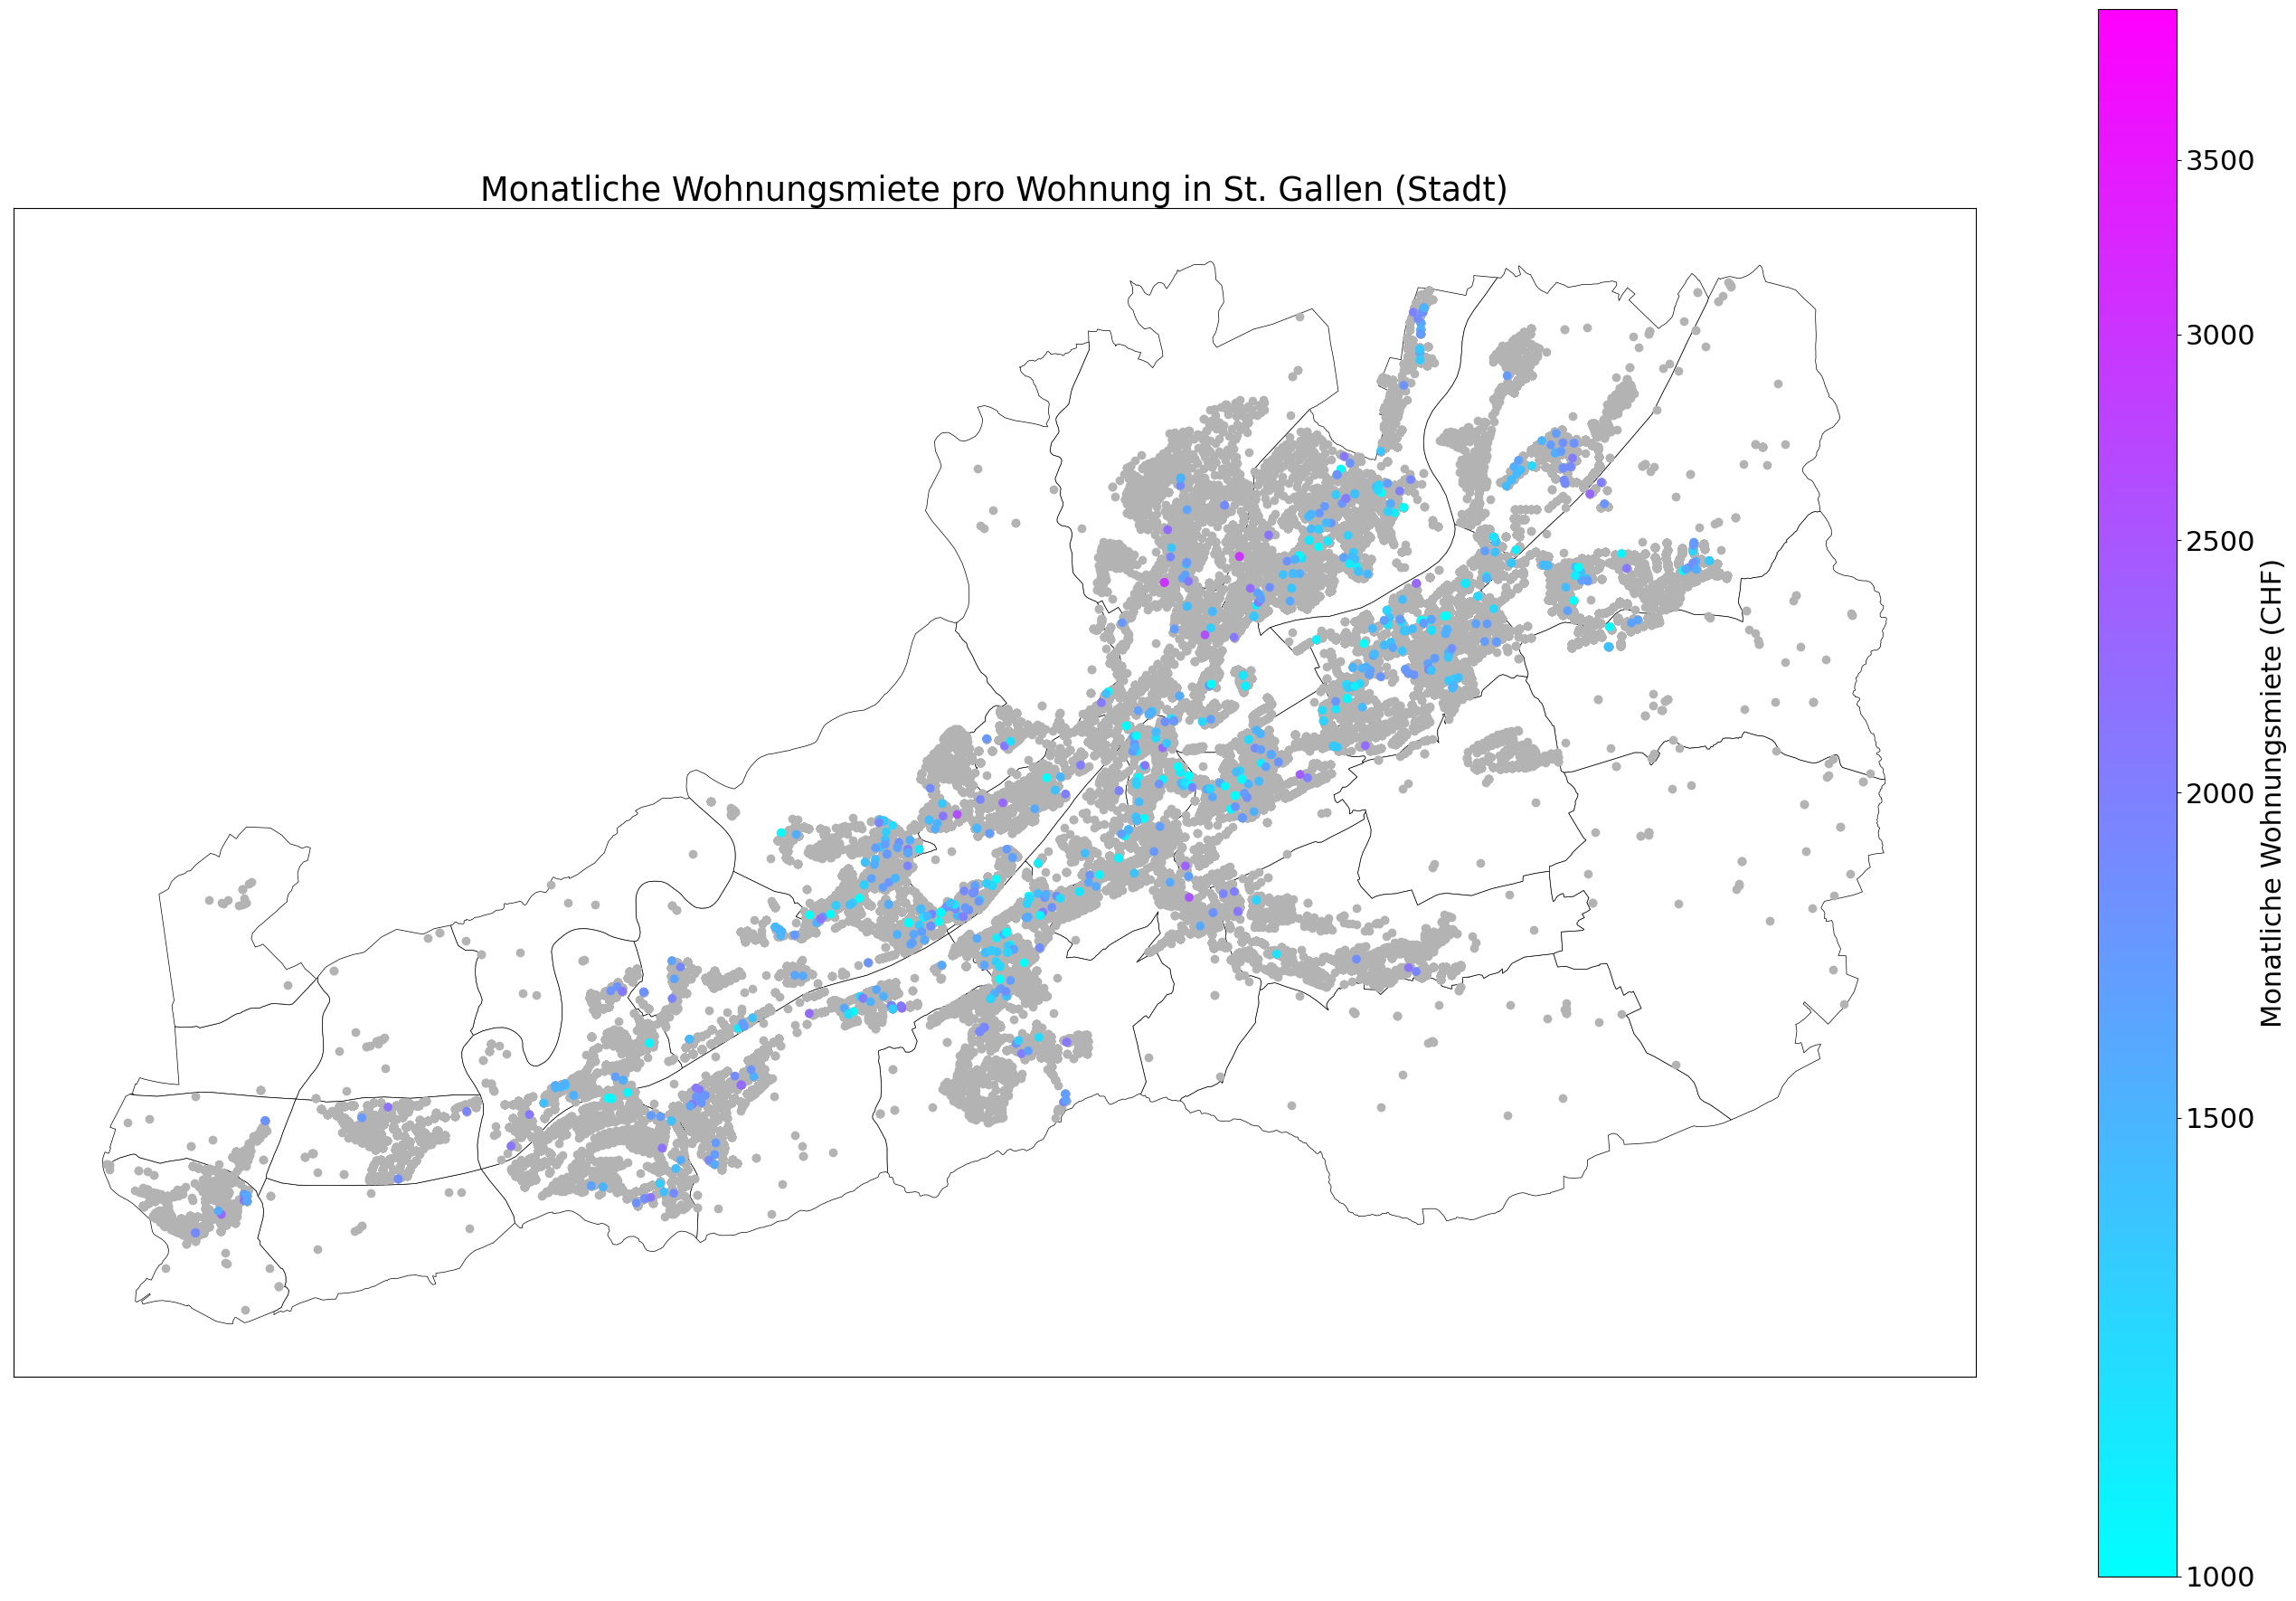

In [354]:
fig, ax = plt.subplots(1)
gpd.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.5)
ax.scatter(x=df_preds.loc[df_preds['price'].isna(),'longitude'], y=df_preds.loc[df_preds['price'].isna(),'latitude'], color=(0.7, 0.7, 0.7))
scatter = ax.scatter(x=df_preds.loc[~df_preds['price'].isna(),'longitude'], y=df_preds.loc[~df_preds['price'].isna(),'latitude'], c=np.log(df_preds.loc[~df_preds['price'].isna(),'prediction']), cmap=cm.cool, vmin=np.log(1000), vmax=np.log(4000))
cb = fig.colorbar(scatter, ax=ax, label='Monatliche Wohnungsmiete (CHF)')
cb.ax.set_yticks(tick_val, tick_text)
ax.set_title('Monatliche Wohnungsmiete pro Wohnung in St. Gallen (Stadt)')
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.savefig('prediction_grey.png')

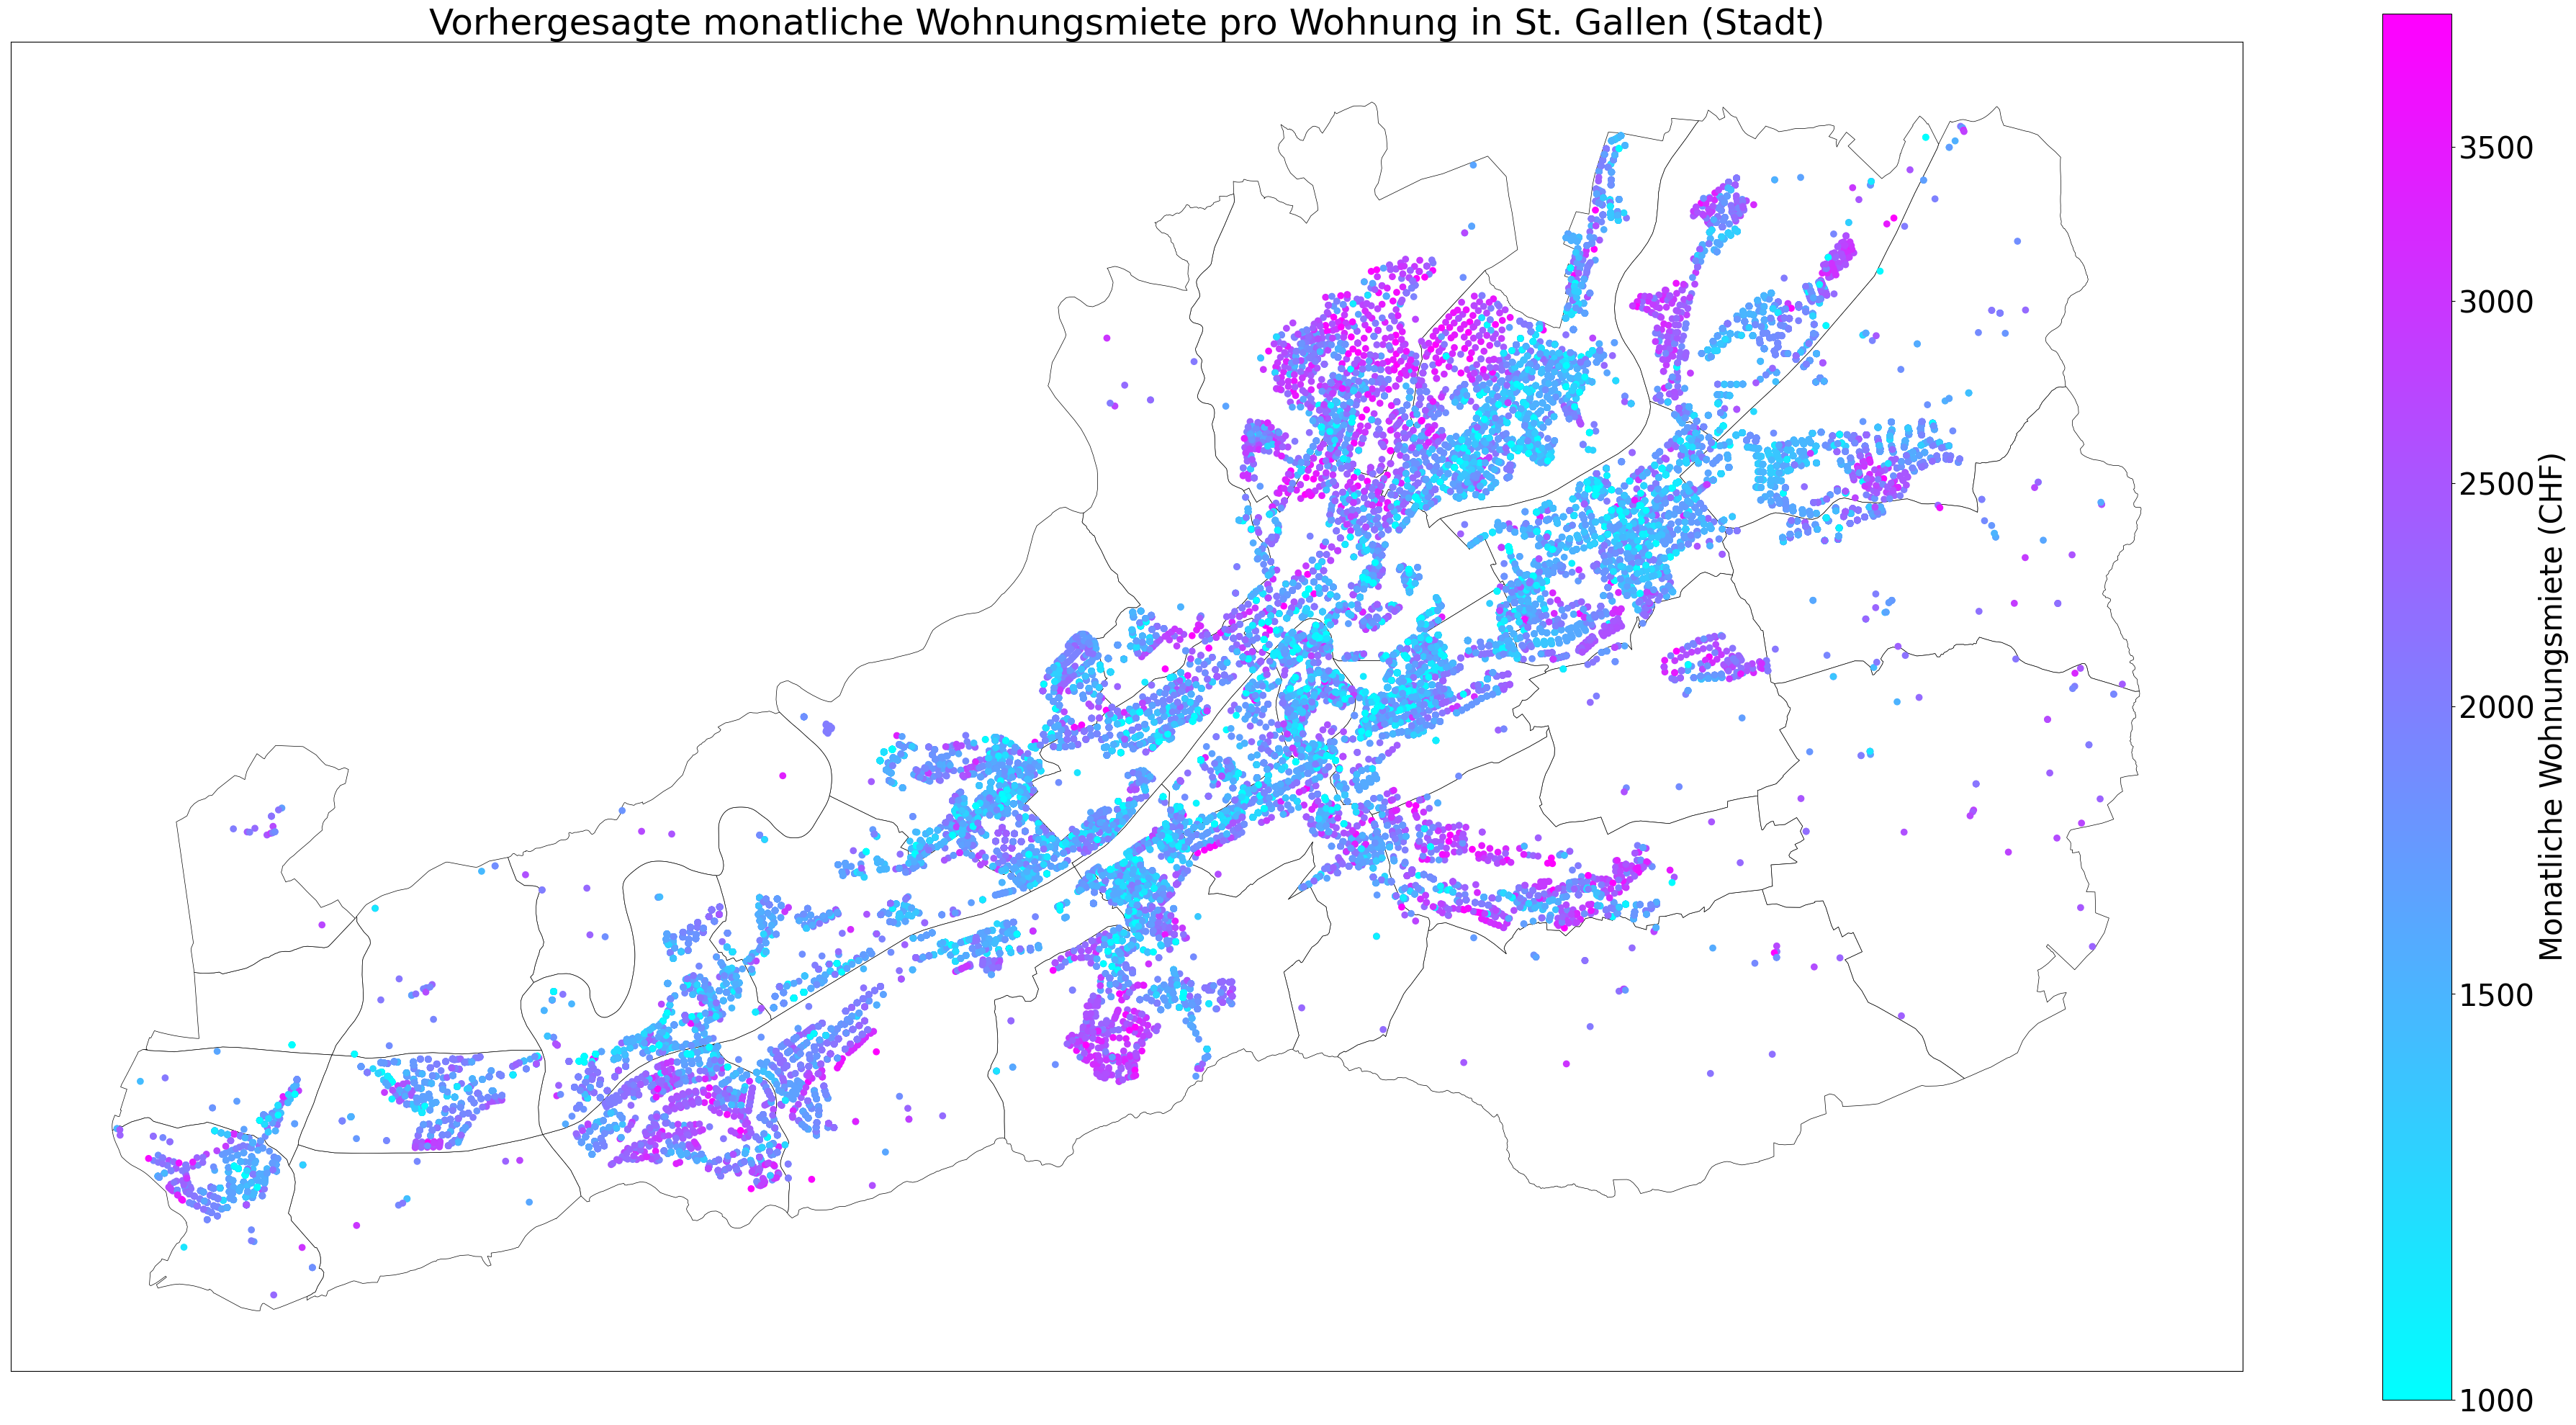

In [360]:
fig, ax = plt.subplots(1)
gpd.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.5)
scatter = ax.scatter(x=df_preds['longitude'], y=df_preds['latitude'], c=np.log(df_preds['prediction']), cmap=cm.cool, vmin=np.log(1000), vmax=np.log(4000))
cb = fig.colorbar(scatter, ax=ax, label='Monatliche Wohnungsmiete (CHF)')
cb.ax.set_yticks(tick_val, tick_text)
ax.set_title('Vorhergesagte monatliche Wohnungsmiete pro Wohnung in St. Gallen (Stadt)')
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.savefig('prediction_grey.svg')

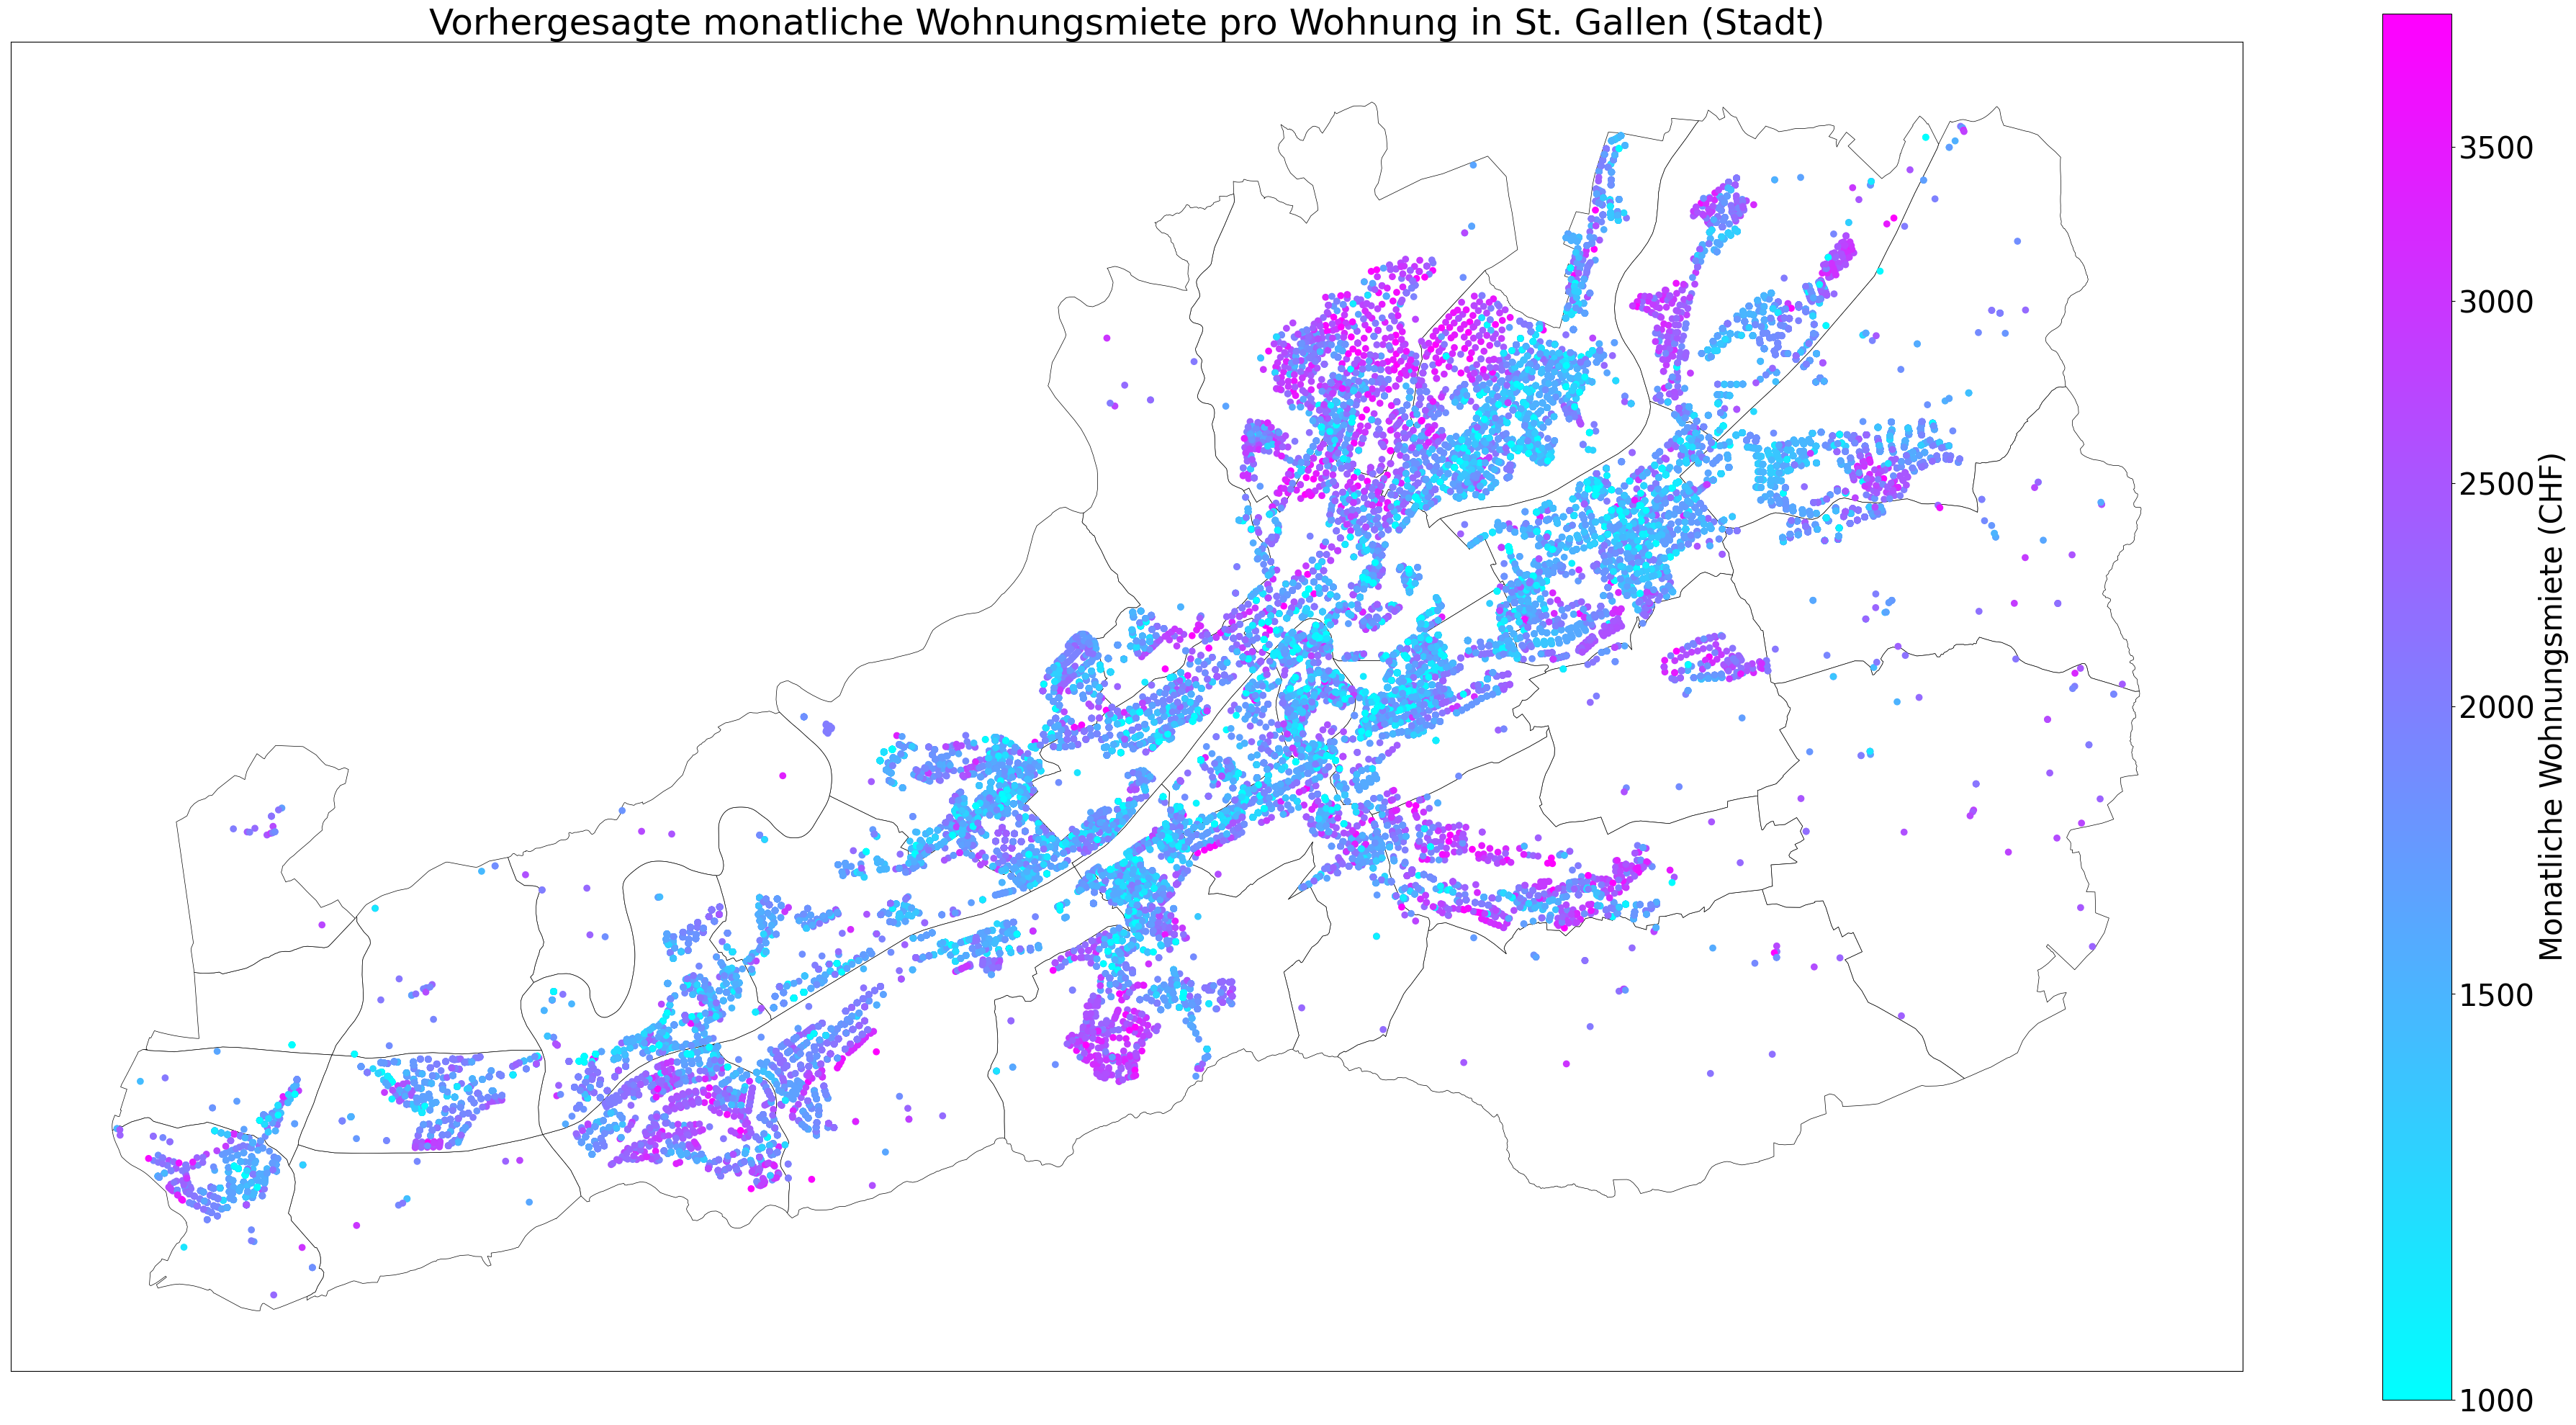

In [361]:
fig, ax = plt.subplots(1)
gpd.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.5)
scatter = ax.scatter(x=df_preds['longitude'], y=df_preds['latitude'], c=np.log(df_preds['prediction']), cmap=cm.cool, vmin=np.log(1000), vmax=np.log(4000))
cb = fig.colorbar(scatter, ax=ax, label='Monatliche Wohnungsmiete (CHF)')
cb.ax.set_yticks(tick_val, tick_text)
ax.set_title('Vorhergesagte monatliche Wohnungsmiete pro Wohnung in St. Gallen (Stadt)')
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.savefig('prediction_full.svg')